# Survival analysis in python

<https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html>

   Status  Survival_in_days
1    True               8.0
2    True              10.0
3    True              20.0
4   False              25.0
5    True              59.0


Text(0.5, 0, 'time $t$')

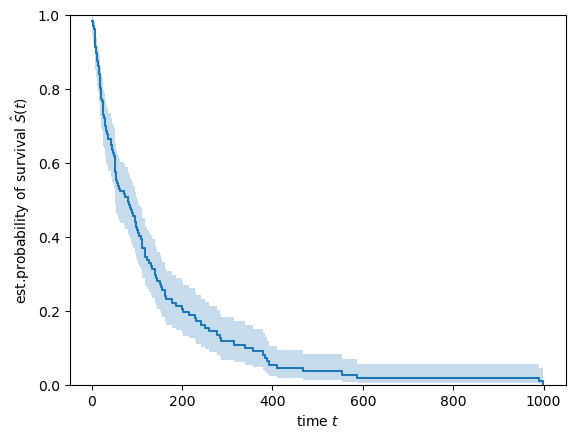

In [1]:

import pandas as pd
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()
print(pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6)))


# Kaplan-Meier
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(

    data_y['Status'], data_y['Survival_in_days'], conf_type='log-log'
)

plt.step(time, survival_prob, where='post')
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step='post')
plt.ylim(0, 1)
plt.ylabel('est.probability of survival $\hat{S}(t)$')
plt.xlabel('time $t$')

In [2]:
data_x['Treatment'].value_counts()

standard    69
test        68
Name: Treatment, dtype: int64

In [ ]:
value_counts

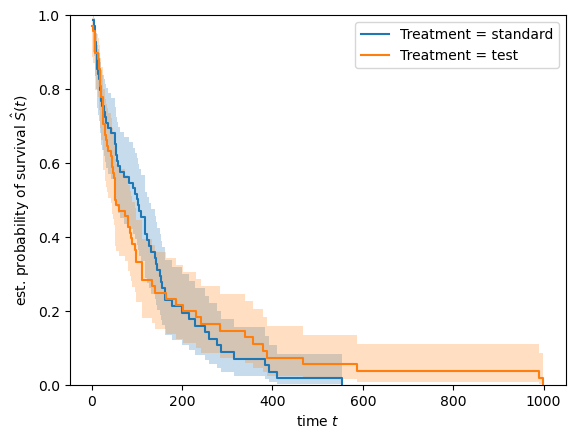

In [3]:
for treatment_type in ('standard', 'test'):
    mask_treat = data_x['Treatment'] == treatment_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
    data_y['Status'][mask_treat],
    data_y['Survival_in_days'][mask_treat],
    conf_type='log-log',
    )
    
    plt.step(time_treatment, survival_prob_treatment, where='post', label=f'Treatment = {treatment_type}')
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha = 0.25, step = 'post')
    
    plt.ylim(0, 1)
    plt.ylabel('est. probability of survival $\hat{S}(t)$')
    plt.xlabel('time $t$')
    plt.legend(loc='best')